In [1]:
from ga_regression import *
from matplotlib import pyplot as plt

C:\Users\dg\.conda\envs\diffnet4\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
folder = r"D:\resynth\run_51_52\run00051_resynth_simplified\2025-06-23-14-20-01"  # 5k faces?
folder = r"D:\resynth\run_51_52\1k_faces\2025-06-24-08-38-34"  # 1k, xyz

folder = r"D:\resynth\run_51_52\1k_faces\2025-06-24-13-10-06"  # hks
folder = r"D:\resynth\run_48_49\1k_faces\2025-06-24-15-40-27"  # hks
folder = r"D:\resynth\run_42_43\1k_faces\2025-06-25-07-41-16"  # hks


# D:\resynth\run_42_43\1k_faces\2025-06-26-10-43-11\diffnet_model_2025-06-26-10-43-11.pt  # hks, latest
folder = r"D:\resynth\run_42_43\1k_faces\2025-06-26-14-39-11"  # hks weighted

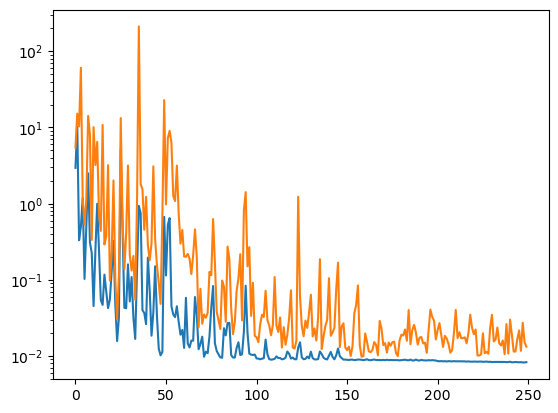

In [3]:
r = Reader(folder)
epoch, ltest = r.scalar('loss/test')
epoch, ltrain = r.scalar('loss/train')
plt.plot(epoch, ltrain, epoch, ltest)
plt.yscale('log')

In [4]:
# self = opts
# scenes, responses, op_cache_dir = GaDataset.load_data(
#     data_file=self.data_file,
#     k_eig=self.k_eig,
#     channel=self.channel,
#     file_mode=self.mesh_file_mode,
#     norm_verts=self.norm_verts,
#     spike_window=self.spike_window,
#     precalc_ops=False,
# )

In [5]:
opts = Options.for_timestamp(
    data_file=Path(r"D:\resynth\run_42_43\1k_faces\run00042_resynth.hdf"),
    channel=(14, 17, 29, 23, 2, 0, 13, 31, 3, 26, 28, 9, 20, 11, 18),
    n_epoch=200,
    input_features='hks',
    dropout=True,
    mesh_file_mode='simplified',
    norm_verts=False,
    spike_window=(0.07, 0.75),
    stamp=Path(folder).parts[-1],
)
meta = torch.load(opts.metadata_file)
train_test_scenes = (meta['train_scenes'], meta['test_scenes'])
train_dataset, test_dataset = opts.load_datasets(precalc_ops=True, train_test_scenes=train_test_scenes)
expt = opts.experiment(train_dataset=train_dataset, test_dataset=test_dataset)
expt.model.load_state_dict(torch.load(opts.model_file))

Pre-calculating operators


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1127/1127 [00:07<00:00, 150.65it/s]


<All keys matched successfully>

In [6]:
train_loader = DataLoader(expt.train_dataset, batch_size=None, shuffle=True)
test_loader = DataLoader(expt.test_dataset, batch_size=None)

In [7]:
obs_train, preds_train = expt.predict(train_loader)
obs_test, preds_test = expt.predict(test_loader)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 57/57 [00:01<00:00, 50.85it/s]


In [8]:
opts.model_file.with_name

<bound method PurePath.with_name of WindowsPath('D:/resynth/run_42_43/1k_faces/2025-06-26-14-39-11/diffnet_model_2025-06-26-14-39-11.pt')>

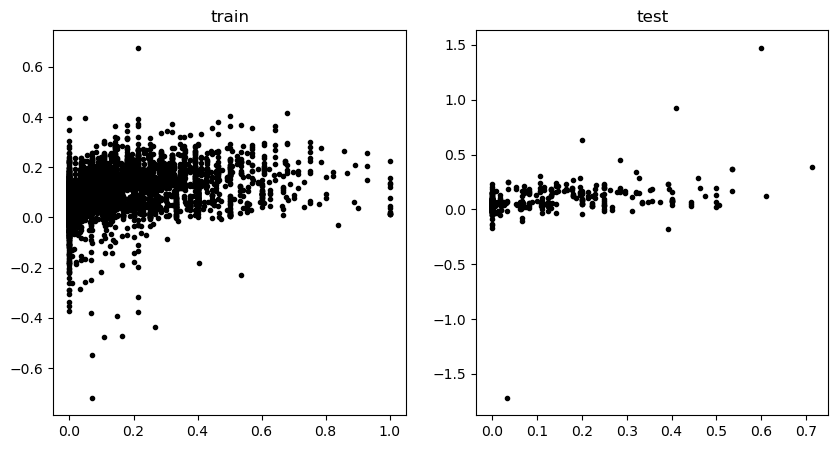

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(obs_train, preds_train, 'k.')
axs[1].plot(obs_test, preds_test, 'k.')
axs[0].set_title('train')
_ = axs[1].set_title('test')